# 01_mlp part

In [ ]:
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

import numpy
import matplotlib.pyplot as plt

2.9.2


In [ ]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# We do some pre-processing on the images: convert from integer to float32 and normalize the pixels to be within 0 to 1
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

print(x_train.shape)

(60000, 28, 28)


The training data (x_train) is a tensor of 60,000 images, each of size 28x28 pixels.

For this notebook, we flatten each image to a vector, so x_train is a matrix of size (60000, 28*28).

In [ ]:
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)

(60000, 784)


y_train is a 60000-dimensional vector containing the correct classes ("0", "1", ..., "9") for each training sample.

In [ ]:
y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)


MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 784)
y_train: (60000,)


### linear model

In [ ]:
def linear_model(W, input_images):
    # f(x) = xW returns m-length vector, where m is the number of examples
    return numpy.dot(input_images, W)

In [ ]:
# use MSE as loss
def evaluate(W, input_images, true_labels):
    predicted_label = linear_model(W, input_images)
    MSE = numpy.mean((true_labels - predicted_label)**2) 
    return MSE

In [ ]:
# use Gradient decent
def learn(input_images, true_labels, current_W, learning_rate=0.000001):
    # first we need dJW/dW where JW = MSE 
    n = input_images.shape[0] # get number of examples to average over
    label_predictions = linear_model(current_W, input_images)
    # calculate gradient: one entry per partial derivative for an entry in vector W
    dJW_dW = (2./n) * numpy.dot(input_images.transpose(), label_predictions - true_labels)
    # now we update W
    new_W = current_W - (learning_rate * dJW_dW)  # gradient update step
    return new_W

In practice, we usually don't use all of the training data to calculate each step. We use a random subset. This makes the steps faster and noisier.

In [ ]:
# At the moment we take the simple route and use a fixed subset. 
batch_size = 100

x_train_batch = x_train[:batch_size, :]
y_train_batch = y_train[:batch_size,numpy.newaxis]

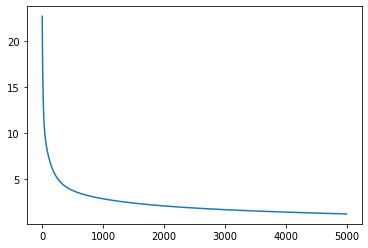

In [ ]:
num_features = x_train.shape[1] # this is the number of pixels

# Randomly initialize W
W = .01 * numpy.random.rand(num_features,1)

# now iterate num_iters times, with the step size defined by learning_rate
learning_rate = 0.0005  
num_iters = 5000
losses = numpy.zeros(num_iters,)

for i in range(0, num_iters):
    # all the magic here
    W = learn(x_train_batch, y_train_batch, W, learning_rate)
    losses[i] = evaluate(W, x_train_batch, y_train_batch)
plt.plot(losses)

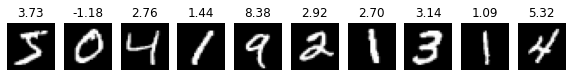

In [ ]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))
predicted_labels = linear_model(W, x_train[:10,:])

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(numpy.reshape(x_train[i,:], (28, 28)), cmap="gray")
    plt.title('%1.2f' % predicted_labels[i])

### In-class exercise: implement "accuracy" - number of images correctly labeled

Answer:

In [ ]:
# define my own accuray function
def myAccuracy (true_labels,predicted_labels):
  # the number of examples
  n = predicted_labels.shape[0]
  correct = 0
  for i,predicted_label in enumerate(predicted_labels):
    if predicted_label == true_labels[i]:
      correct +=1
  return correct/n


In [ ]:
# add accuracy to evaluation
def myEvaluate(W, input_images, true_labels):
    predicted_scores = linear_model(W, input_images)
    MSE = numpy.mean((true_labels - predicted_scores)**2) 
    predicted_labels = numpy.round(predicted_scores) 
    accuracy = myAccuracy(true_labels,predicted_labels)
    return MSE, accuracy

accuracy after all iterations: 0.34


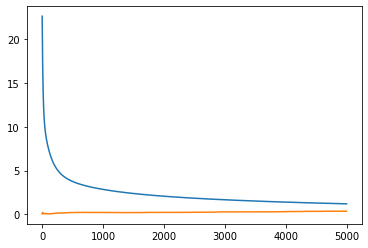

In [ ]:
# check myAccuracy
num_features = x_train.shape[1] # this is the number of pixels

# Randomly initialize W
W = .01 * numpy.random.rand(num_features,1)

# now iterate num_iters times, with the step size defined by learning_rate
learning_rate = 0.0005  
num_iters = 5000
losses = numpy.zeros(num_iters,)
accuracies = numpy.zeros(num_iters,)

for i in range(0, num_iters):
    # all the magic here
    W = learn(x_train_batch, y_train_batch, W, learning_rate)
    losses[i],accuracies[i] = myEvaluate(W, x_train_batch, y_train_batch)

plt.plot(losses)
plt.plot(accuracies)
print(f"accuracy after all iterations: {accuracies[-1]}")

### Improving the model
Examples of basic ways to improve:
- Add bias term: f(x) = xW + b 
- Reformulate as classification (output integers, not real numbers), like logistic regression
- Minimize something other than mean squared error

In [ ]:
def sigmoid(x):
    z = 1/(1 + numpy.exp(-x))
    return(z)

def classification_model(A, b, input_images):
    # f(x) = sigmoid(xA + b) returns m-length vector, where m is the number of examples
    return sigmoid(numpy.dot(input_images, W) + b)

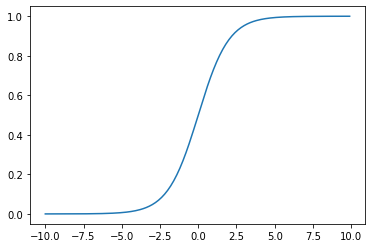

In [ ]:
x = numpy.arange(-10, 10, step=.1)
plt.plot(x, sigmoid(x))

To handle multiple classes, it's common to use a one-hot encoding:

In [26]:
# one-hot encoding:
nb_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

Training sample 0 : class: 5 , one-hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Training sample 1 : class: 0 , one-hot encoded: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 2 : class: 4 , one-hot encoded: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Training sample 3 : class: 1 , one-hot encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 4 : class: 9 , one-hot encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Training sample 5 : class: 2 , one-hot encoded: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Training sample 6 : class: 1 , one-hot encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 7 : class: 3 , one-hot encoded: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Training sample 8 : class: 1 , one-hot encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 9 : class: 4 , one-hot encoded: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


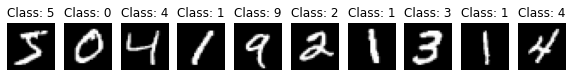

In [ ]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(numpy.reshape(x_train[i,:], (28, 28)), cmap="gray")
    plt.title('Class: '+str(y_train[i]))
    print('Training sample',i,': class:',y_train[i], ', one-hot encoded:', y_train_onehot[i])

 handle multi-class classification, it's common to use softmax instead of sigmoid. It's related but forces the outputs to sum to 1, like a probability distribution. The class with the highest value is the prediction.

In [ ]:
def softmax(x):
    normalization = numpy.sum(numpy.exp(x),axis=1)
    z = numpy.exp(x) / normalization[:,None]
    return(z)

In [ ]:
# Randomly initialize W and b
W = .01 * numpy.random.rand(num_features,10)
b = .01 * numpy.random.rand(10,)

def classification_model(W, b, input_images):
    # f(x) = softmax(xW + b) returns m x 10 matrix, where m is the number of examples and 10 is the number of classes
    return softmax(numpy.dot(input_images, W) + b)

In [ ]:
# To demonstrate softmax, we can apply this model with random W & b
predicted_labels = classification_model(W, b, x_train[:5,:])

In [ ]:
# Here the class "probabilities" might all be very similar since the model hasn't been trained
print(predicted_labels[0,:])
print(sum(predicted_labels[0,:]))

[0.098877   0.10059224 0.10222146 0.10315077 0.09832581 0.1001802
 0.10068389 0.09886806 0.09540515 0.10169542]
1.0000000000000002


## Nonlinear Model
A neural network has multiple layers. A basic layer is  𝜎(𝑥𝐴+𝑏) , where  𝜎  is a nonlinear "activation function." An example neural network with two layers adds another affine transformation:
$f(x) = \sigma(\sigma(xW_1 + b_1)W_2 + b_2)$

In [ ]:
#Writing it in numpy, with sigmoid as the activation function:
def nonlinear_model(W1, W2, b1, b2, input_images):
    return sigmoid(numpy.dot(sigmoid(numpy.dot(input_images, W1) + b1), W2) + b2)

Adding another layer:

$f(x) = \sigma(\sigma(\sigma(xW_1 + b_1)W_2 + b_2)W_3 + b_3)$

In [ ]:
def nonlinear_model(A1, A2, A3, b1, b2, b3, input_images):
    return sigmoid(numpy.dot(sigmoid(numpy.dot(sigmoid(numpy.dot(input_images, A1) + b1), A2) + b2), A3) + b3)

### In-class exercise: split the training data into training & validation, and track validation loss during the training loop.

Answer:

In [ ]:
from sklearn.model_selection import train_test_split
x_train_batch, x_val_batch, y_train_batch, y_val_batch = train_test_split(x_train_batch, y_train_batch, test_size=0.3, random_state=1)

Streaming output truncated to the last 5000 lines.
runingn the 2 iteration
runingn the 3 iteration
runingn the 4 iteration
runingn the 5 iteration
runingn the 6 iteration
runingn the 7 iteration
runingn the 8 iteration
runingn the 9 iteration
runingn the 10 iteration
runingn the 11 iteration
runingn the 12 iteration
runingn the 13 iteration
runingn the 14 iteration
runingn the 15 iteration
runingn the 16 iteration
runingn the 17 iteration
runingn the 18 iteration
runingn the 19 iteration
runingn the 20 iteration
runingn the 21 iteration
runingn the 22 iteration
runingn the 23 iteration
runingn the 24 iteration
runingn the 25 iteration
runingn the 26 iteration
runingn the 27 iteration
runingn the 28 iteration
runingn the 29 iteration
runingn the 30 iteration
runingn the 31 iteration
runingn the 32 iteration
runingn the 33 iteration
runingn the 34 iteration
runingn the 35 iteration
runingn the 36 iteration
runingn the 37 iteration
runingn the 38 iteration
runingn the 39 iteration
runingn

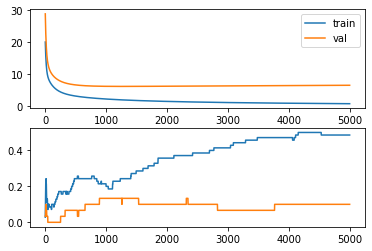

In [ ]:
# redo the training and validation again
num_features = x_train.shape[1] # this is the number of pixels

# Randomly initialize W
W = .01 * numpy.random.rand(num_features,1)

# now iterate num_iters times, with the step size defined by learning_rate
learning_rate = 0.0005  
num_iters = 5000
train_losses = numpy.zeros(num_iters,)
train_accuracies = numpy.zeros(num_iters,)
val_losses = numpy.zeros(num_iters,)
val_accuracies = numpy.zeros(num_iters,)

# training
for i in range(0, num_iters):
    print(f"runingn the {i+1} iteration")
    # all the magic here
    W = learn(x_train_batch, y_train_batch, W, learning_rate)
    train_losses[i],train_accuracies[i] = myEvaluate(W, x_train_batch, y_train_batch)
    val_losses[i], val_accuracies[i] = myEvaluate(W, x_val_batch, y_val_batch)


print(f"At the last iteration, validation loss is {val_losses[-1]}, and validaation accuracy is {val_accuracies[-1]}")

# plot
plt.figure()
plt.subplot(2,1,1)
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(["train", "val"])
plt.subplot(2,1,2)
plt.plot(train_accuracies)
plt.plot(val_accuracies)

# 02_full_net part

In [18]:
%load_ext autoreload
%autoreload 2

In [35]:
# Here we import an implementation of a two-layer neural network 
# this code is based on pieces of the first assignment from Stanford's CSE231n course, 
# hosted at https://github.com/cs231n/cs231n.github.io with the MIT license
from fc_net import TwoLayerNet

In [36]:
# repeating the data prep from the previous notebook
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# EDIT: splitting training data into train and val because this is better practice than using test data to
# choose models/hyperparameters
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

x_train = x_train.astype(numpy.float32)
# EDIT: adding pre-processing to validation data 
x_val  = x_val.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_val  /= 255.
x_test  /= 255.

print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_val = x_val.reshape(x_val.shape[0], numpy.prod(x_val[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)
y_train = y_train.astype(numpy.int32)
y_val  = y_val.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'val:',len(x_val), 'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)

# one-hot encoding:
nb_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_val_onehot = tf.keras.utils.to_categorical(y_val, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

(40200, 28, 28)
(40200, 784)

MNIST data loaded: train: 40200 val: 19800 test: 10000
X_train: (40200, 784)
y_train: (40200,)


In [20]:
# a simple implementation of stochastic gradient descent
def sgd(model, gradients, learning_rate):
    for p, w in model.params.items():
        dw = gradients[p]
        new_weights = w - learning_rate * dw
        model.params[p] = new_weights

In [21]:
# one training step
def learn(model, x_train, y_train_onehot, learning_rate):
    loss, gradients = model.loss(x_train, y_train_onehot)
    sgd(model, gradients, learning_rate)
    return loss

In [22]:
def accuracy(model, x, true_values):
    scores = model.loss(x)
    predictions = numpy.argmax(scores, axis=1)
    N = predictions.shape[0]
    # EDIT: squeezing true_values from 2d to 1d speeds up this function
    true_values_1d = numpy.squeeze(true_values)
    acc = (true_values_1d == predictions).sum() / N
    return acc

In [23]:
# EDIT: decided to track how long each epoch takes
import time

In [40]:
# Here's an example training loop using this two-layer model. Can you do better? 

# EDIT: also track validation data
# EDIT: factoring this out into a function to make it easier to compare options
def training(learning_rate, batch_size, num_epochs, hidden_dim, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot):
    num_features = x_train.shape[1] # this is the number of pixels
    nb_classes = y_train_onehot.shape[1]
    
    # The weights are initialized from a normal distribution with standard deviation weight_scale
    model = TwoLayerNet(input_dim=num_features, hidden_dim=hidden_dim, num_classes=nb_classes, weight_scale=weight_scale)
    
    num_examples_train = x_train.shape[0]
    num_batches_train = int(num_examples_train / batch_size)
    
    losses = numpy.zeros((num_batches_train*num_epochs,2)) # 1st column for training data, 2nd for validation data
    # EDIT: also track accuracy
    accuracies = numpy.zeros((num_batches_train*num_epochs,2)) 
    
    indices_train = numpy.arange(num_examples_train)
    num_examples_val = x_val.shape[0]
    indices_val = numpy.arange(num_examples_val)

    i = 0

    val_accuracies = []
    for epoch in range(0, num_epochs):
        start_epoch = time.time()
        # in each epoch, we loop over all of the training examples
        for step in range(0, num_batches_train):
            # grabbing the next training batch
            offset_train = step * batch_size
            batch_range_train = range(offset_train, offset_train+batch_size)
            x_train_batch = x_train[batch_range_train, :]
            # EDIT: keep around non-onehot labels as well for accuracy calculation
            y_train_onehot_batch = y_train_onehot[batch_range_train,:]
            y_train_batch = y_train[batch_range_train,numpy.newaxis]

            # one approach: grab a random validation batch (random offset into number of validation examples)
            offset_val = numpy.random.randint(low=0, high=num_examples_val-batch_size)
            batch_range_val = range(offset_val, offset_val+batch_size)
            x_val_batch = x_val[batch_range_val, :]
            y_val_onehot_batch = y_val_onehot[batch_range_val,:]
            y_val_batch = y_val[batch_range_val,numpy.newaxis]

            # feed the next batch in to do one sgd step
            loss_train = learn(model, x_train_batch, y_train_onehot_batch, learning_rate)

            # check training & validation loss & accuracy
            losses[i,0] = loss_train
            
            # could save time by commenting out the next three lines and only tracking at the epoch level
            accuracies[i,0] = accuracy(model, x_train_batch, y_train_batch)
            losses[i,1], _ = model.loss(x_val_batch, y_val_onehot_batch)
            accuracies[i,1] = accuracy(model, x_val_batch, y_val_batch)
            i += 1

        # slower, so we're only doing this once per epoch: checking accuracy on all of the data at once
        acc_train = accuracy(model, x_train, y_train)
        acc_val = accuracy(model, x_val, y_val)
        val_accuracies.append(acc_val)

        # reshuffle the data so that we get a new set of batches
        numpy.random.shuffle(indices_train)
        x_train = x_train[indices_train,:]
        y_train = y_train[indices_train] # keep this shuffled the same way for use in accuracy calculation
        y_train_onehot = y_train_onehot[indices_train,:]

        numpy.random.shuffle(indices_val)
        x_val = x_val[indices_val,:]
        y_val = y_val[indices_val] 
        y_val_onehot = y_val_onehot[indices_val,:]
        end_epoch = time.time()
        time_this_epoch = end_epoch - start_epoch
        print("epoch %d took %.1f seconds, training loss %.5f (last batch), training accuracy %.3f, validation accuracy %.3f" % (epoch, time_this_epoch, loss_train, acc_train, acc_val))
    return losses, accuracies, model, val_accuracies


epoch 0 took 8.9 seconds, training loss 2.30279 (last batch), training accuracy 0.103, validation accuracy 0.106
epoch 1 took 8.8 seconds, training loss 2.30146 (last batch), training accuracy 0.123, validation accuracy 0.125
epoch 2 took 10.7 seconds, training loss 2.30054 (last batch), training accuracy 0.146, validation accuracy 0.149
epoch 3 took 8.7 seconds, training loss 2.29952 (last batch), training accuracy 0.170, validation accuracy 0.172
epoch 4 took 8.6 seconds, training loss 2.29818 (last batch), training accuracy 0.190, validation accuracy 0.192
epoch 5 took 10.6 seconds, training loss 2.29734 (last batch), training accuracy 0.205, validation accuracy 0.211
epoch 6 took 8.7 seconds, training loss 2.29605 (last batch), training accuracy 0.219, validation accuracy 0.222
epoch 7 took 8.6 seconds, training loss 2.29522 (last batch), training accuracy 0.230, validation accuracy 0.233
epoch 8 took 8.6 seconds, training loss 2.29391 (last batch), training accuracy 0.239, validat

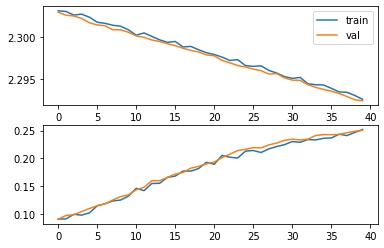

In [38]:
# these are the hyperparameters we had in class
learning_rate = 0.01  
batch_size = 10000
num_epochs = 10
hidden_dim = 300
weight_scale = .01
losses, accuracies, model = training(learning_rate, batch_size, num_epochs, hidden_dim, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot)

# EDIT: plot training & val, loss & accuracy
plt.figure()
plt.subplot(2,1,1)
plt.plot(losses[:,0])
plt.plot(losses[:,1])
plt.legend(["train", "val"])

plt.subplot(2,1,2)
plt.plot(accuracies[:,0])
plt.plot(accuracies[:,1])

### Homework: improve the accuracy of this model.
Update this notebook so that the accuracy is improved. How high can you get it? You could change things directly in the notebook, such as increasing the number of epochs, changing the learning weight, changing the width of the hidden layer, etc. If you're more ambitious, you could also try changing the model definition itself by checking out the associated Python files. For example, you could add more layers to the network. The current notebook has a training accuracy of about 43%, but will vary with randomness.

Answer:
Try to find a better hyperparameter by comparing the validation accuracies using different sets of learning rate and hidden dim

After the hand-over validation, we find the best learning rate as 0.1 and hidden dim as 1000 with maximum validation accuracy as 0.675

In [41]:
learning_rate_options = [0.1,0.01,0.001]
hidden_dim_options  = [300,500,1000]

# initialize the best learning rate and best hidden dim as the first option
best_lr = learning_rate_options[0]
best_hd = hidden_dim_options[0]
# initialize the maximum validation accuracy
max_val_acc = 0

for lr in learning_rate_options:
  for hd in hidden_dim_options:
    losses, accuracies, model, val_accuracies = training(lr, batch_size, num_epochs, hd, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot)
    cur_val_acc = sum(val_accuracies)/num_epochs
    # update the current best when the current validation accuracy is higher
    if cur_val_acc > max_val_acc : 
      max_val_acc = cur_val_acc
      best_lr = lr
      best_hd = hd

print(f"The validation accuracy reaches {max_val_acc} when using learning rate:{best_lr} and hidden dim:{best_hd}")

epoch 0 took 8.9 seconds, training loss 2.29505 (last batch), training accuracy 0.333, validation accuracy 0.339
epoch 1 took 8.2 seconds, training loss 2.28368 (last batch), training accuracy 0.464, validation accuracy 0.466
epoch 2 took 8.5 seconds, training loss 2.27052 (last batch), training accuracy 0.539, validation accuracy 0.536
epoch 3 took 8.4 seconds, training loss 2.25259 (last batch), training accuracy 0.576, validation accuracy 0.574
epoch 4 took 8.5 seconds, training loss 2.23002 (last batch), training accuracy 0.591, validation accuracy 0.588
epoch 5 took 8.2 seconds, training loss 2.19942 (last batch), training accuracy 0.598, validation accuracy 0.597
epoch 6 took 8.3 seconds, training loss 2.15957 (last batch), training accuracy 0.607, validation accuracy 0.607
epoch 7 took 8.4 seconds, training loss 2.10820 (last batch), training accuracy 0.620, validation accuracy 0.620
epoch 8 took 8.3 seconds, training loss 2.04686 (last batch), training accuracy 0.644, validatio